# Exploratory Data Visualization Individual Assignment


*   Student Name: Zhang Huiyi
*   Student Number: 24474940



In [3]:
#1.Load Data: Import the CSV file.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

csv_file_path = '/content/Integrated_Education_EN.csv' # Follow this path to run，please!
data = pd.read_csv(csv_file_path)

#2.Initial Check And Descriptive Statistics
# Data structure:
print("1.Data Structure:\n", data.head())
# Data types invovled:
print("\n2.Data Type:\n", data.dtypes)
# Descriptive statistics for numerical variables
numerical_stats = data.describe()
print("\n3.Descriptive Statistics for Numerical Variables:\n", numerical_stats)
# Frequency of categorical variables
categories = ['Type', 'SchoolLevel', 'SchoolYear']
print("\n4.Frequency of categories:")
for category in categories:
    freq = data[category].value_counts()
    print(f'\n{freq}\n')

1.Data Structure:
   SchoolLevel Type SchoolYear  NoOfStudents
0     Primary   ID    2018/19           760
1     Primary   ID    2019/20           810
2     Primary   ID    2020/21           930
3     Primary   ID    2021/22           990
4     Primary   ID    2022/23          1090

2.Data Type:
 SchoolLevel     object
Type            object
SchoolYear      object
NoOfStudents     int64
dtype: object

3.Descriptive Statistics for Numerical Variables:
        NoOfStudents
count    108.000000
mean    3175.648148
std     4077.083499
min       30.000000
25%      150.000000
50%      785.000000
75%     5770.000000
max    14040.000000

4.Frequency of categories:

Type
ID       12
ASD      12
AD/HD    12
MI       12
SpLD     12
PD       12
VI       12
HI       12
SLI      12
Name: count, dtype: int64


SchoolLevel
Primary      54
Secondary    54
Name: count, dtype: int64


SchoolYear
2018/19    18
2019/20    18
2020/21    18
2021/22    18
2022/23    18
2023/24    18
Name: count, dtype: int64



# Dataset Analysis
**Data Structure And Data Type**

The dataset includes 4 columns: `SchoolLevel`, Type, `SchoolYear`, and `NoOfStudents`.

- `SchoolLevel`: The categorical variables.
- `Type`: The categorical variables.
- `SchoolYear`: The categorical variables, which represents discrete time periods.
- `NoOfStudents`: The numerical variableis mearsured as an integer count. Represents the number of students with the specified special educational need.

**Descriptive Statistics for Numerical Variables**

There are 108 entries in the dataset. The average number of students with special needs is approximately 175.65 per entry. The minimum number recorded is 30, and the maximum is 14040.


**Frequency of Categories**

Each type of special educational need is represented equally with 12 entries.
The SchoolLevel is almost evenly split between Primary (54 entries) and Secondary (54 entries).SchoolYear has 18 entries for each academic year from 2018/19 to 2023/24.

**Further Analysis**

- Identify trends over time and differences between school levels and types of needs.
- Investigate potential correlations between the number of students and school level or type of need.
- Analyse the distribution of student numbers per type and year to reveal specific areas needing educational support or policy attention.


In [4]:
#3.Preprocess the data:
#Check if there are null values.
has_null_values = data.isnull().any().any()
print(f"Null values: {has_null_values}")

# Convert 'Type' abbreviations to full names
type_mapping = {
    'ID': 'Intellectual Disability',
    'ASD': 'Autism Spectrum Disorder',
    'AD/HD': 'Attention Deficit/Hyperactivity Disorder',
    'MI': 'Moderate Intellectual Disability',
    'SpLD': 'Specific Learning Disability',
    'PD': 'Physical Disability',
    'VI': 'Visual Impairment',
    'HI': 'Hearing Impairment',
    'SLI': 'Speech and Language Impairment'
}

data['Type'] = data['Type'].map(type_mapping)

Null values: False


# Data Visualization

In [16]:
# Total number of special students per school year:
total_students_per_year = data.groupby('SchoolYear')['NoOfStudents'].sum()
print("Total number of special students per school year:")

# Rename the column
total_students_per_year_renamed = total_students_per_year.rename('Number of Special Students')
display(total_students_per_year_renamed)

Total number of special students per school year:


,Number of Special Students
SchoolYear,
2018/19,49080
2019/20,53180
2020/21,56640
2021/22,58890
2022/23,60960
2023/24,64220


<Figure size 1000x600 with 0 Axes>

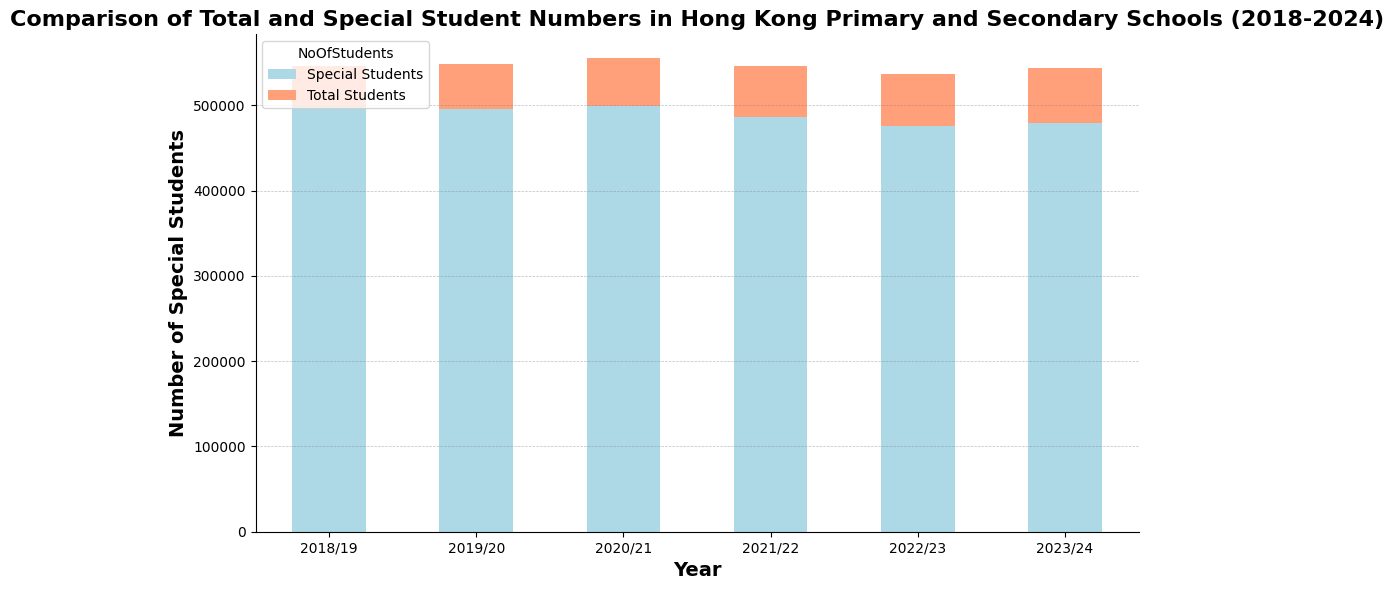

In [7]:
# 1.Stacked Bar Chart: Total and Special Student Numbers in Hong Kong Primary and Secondary Schools (2018-2024)

# Introduce additional external data: Total number of students in Hong Kong Primary and Secondary Schools
PrimarySum = [172000, 170100, 162400,153600,148200,141000]
SecondarySum = [325600,325700,336600,333300,327600,338700]
# Add the portion of special students in this dataset
frameData = {
    "year": data['SchoolYear'].unique(),
    "totalStudents": [a + b for a, b in zip(PrimarySum, SecondarySum)],
    "specialStudents": data.groupby(['SchoolYear'])['NoOfStudents'].sum().unique()
}

df = pd.DataFrame(frameData)
plt.figure(figsize=(10, 6))
colors = ['#ADD8E6', '#FFA07A']
df.plot(kind='bar', stacked=True, figsize=(10, 6), x='year', color=colors)

plt.title('Comparison of Total and Special Student Numbers in Hong Kong Primary and Secondary Schools (2018-2024)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Number of Special Students', fontsize=14, fontweight='bold')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
plt.legend(labels=['Special Students', 'Total Students'], title='NoOfStudents', loc='upper left')
plt.tight_layout()
sns.despine()

plt.show()

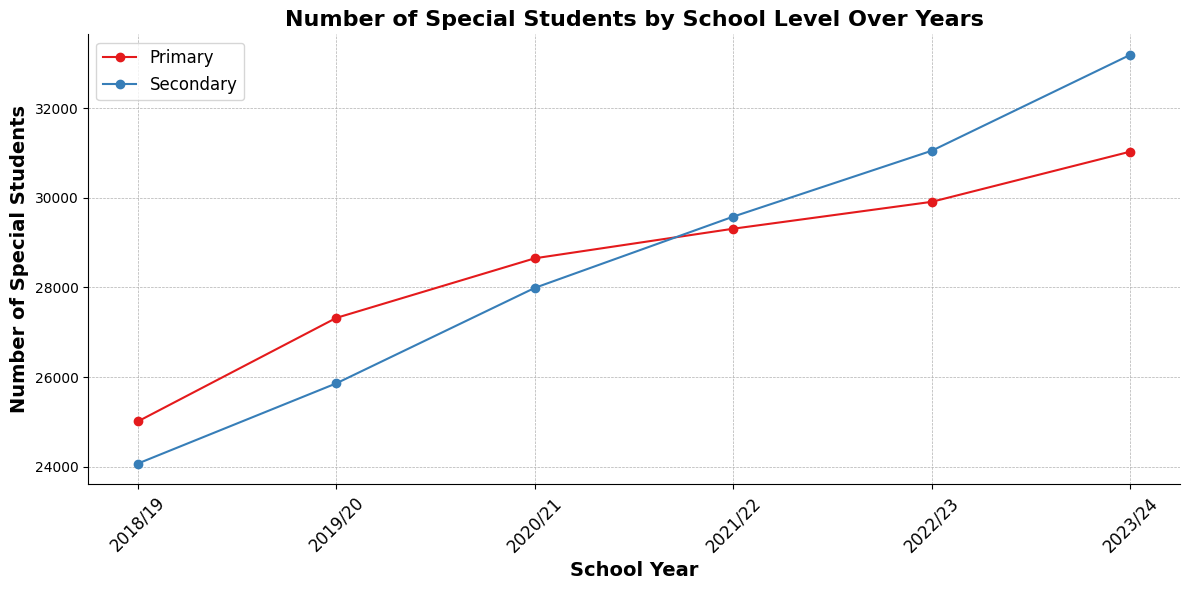

In [8]:
# 2.Line chart: Changes in the Number of Students by School Level Over Years
grouped_data_line = data.groupby(['SchoolLevel', 'SchoolYear'])['NoOfStudents'].sum().reset_index()
pivot_data_line = grouped_data_line.pivot(index='SchoolYear', columns='SchoolLevel', values='NoOfStudents')
plt.figure(figsize=(12, 6))

palette = sns.color_palette("Set1")
num_colors = len(palette)

for idx, column in enumerate(pivot_data_line.columns):
    plt.plot(pivot_data_line.index, pivot_data_line[column],
             label=column, marker='o', color=palette[idx % num_colors])

plt.title('Number of Special Students by School Level Over Years', fontsize=16,  fontweight='bold')
plt.xlabel('School Year', fontsize=14, fontweight='bold')
plt.ylabel('Number of Special Students', fontsize=14, fontweight='bold')
plt.legend(loc='best', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
sns.despine()
plt.show()

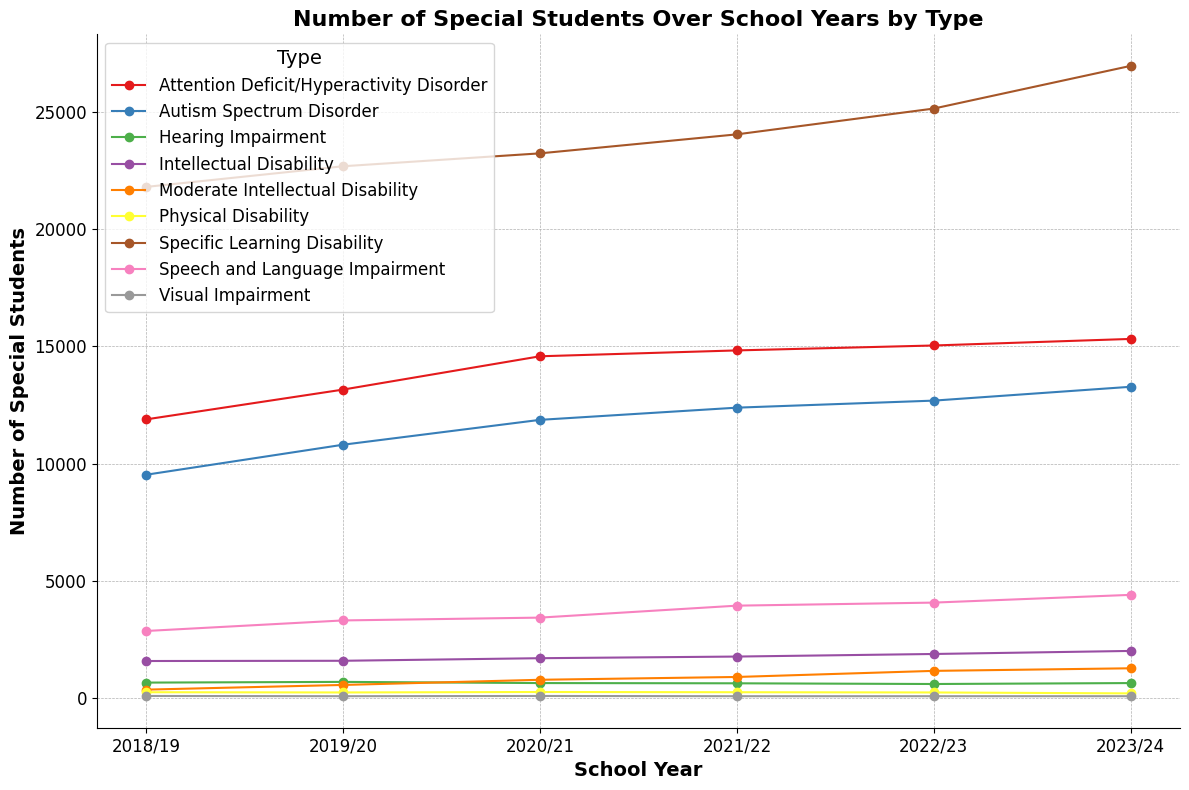

In [9]:
# 3.Line chart: Number of Special Students Over School Years by Type
df = data.groupby(['Type','SchoolYear'])['NoOfStudents'].sum().reset_index()
plt.figure(figsize=(12, 8))

palette = sns.color_palette("Set1")
num_colors = len(palette)

for idx, type_ in enumerate(df['Type'].unique()):
    if idx < num_colors:
        subset = df[df['Type'] == type_]
        plt.plot(subset['SchoolYear'], subset['NoOfStudents'], marker='o',
                 color=palette[idx % num_colors], label=type_)

plt.title('Number of Special Students Over School Years by Type', fontsize=16, fontweight='bold')
plt.xlabel('School Year', fontsize=14, fontweight='bold')
plt.ylabel('Number of Special Students', fontsize=14, fontweight='bold')

plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(title='Type', fontsize=12, title_fontsize=14, loc='upper left')
sns.despine()
plt.tight_layout()
plt.show()


<ipython-input-10-359d345706ba>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Type', y='NoOfStudents', data=classification_analysis, palette=palette)


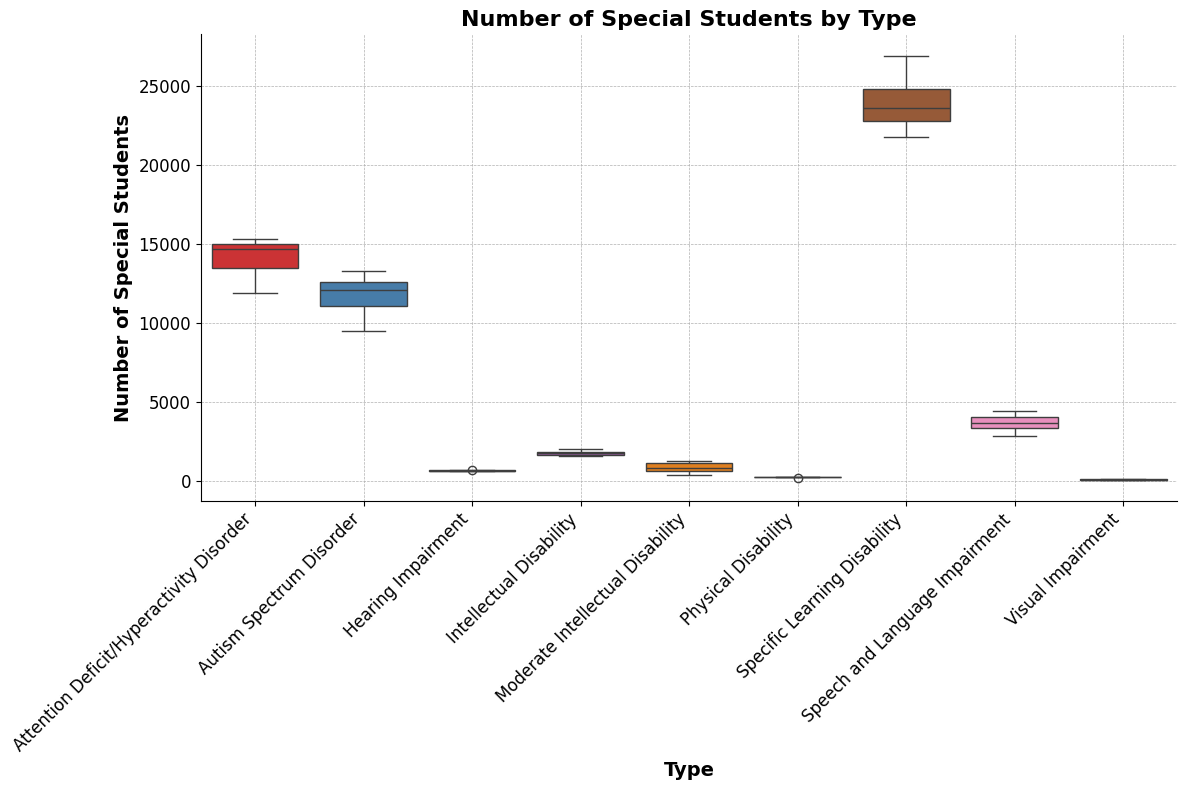

In [10]:
# 4.Boxplot: NoOfStudents by Type
classification_analysis = data.groupby(['Type','SchoolYear'])['NoOfStudents'].sum().reset_index()

plt.figure(figsize=(12, 8))
palette = sns.color_palette("Set1")
sns.boxplot(x='Type', y='NoOfStudents', data=classification_analysis, palette=palette)
plt.title('Number of Special Students by Type', fontsize=16, fontweight='bold')
plt.xlabel('Type', fontsize=14, fontweight='bold')
plt.ylabel('Number of Special Students', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
sns.despine()
plt.tight_layout()
plt.show()
